# 📊 Análisis de Datos Cognitivos – NeuroCoach IA

Este notebook te permitirá explorar de forma interactiva la evolución de tus niveles de energía, estado de ánimo y resultados según distintas variables. Iremos paso a paso con visualizaciones, agrupaciones y observaciones clave.

---

## Paso 1: Carga de datos y transformación de fechas
Aquí combinamos fecha y hora en una sola columna `Datetime`, ordenamos cronológicamente y extraemos el día de la semana. Así podemos analizar mejor los patrones temporales.


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Carga del archivo CSV
ruta_csv = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..', 'registro_cognitivo.csv'))
df = pd.read_csv(ruta_csv)

# Conversión a datetime
df['Datetime'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora'])
df = df.sort_values(by='Datetime')
df['Dia_Semana'] = df['Datetime'].dt.day_name()

df.head()


,Fecha,Hora,Energia,Estado_Animo,Tarea,Tipo_tarea,Resultado,Comentarios,Punto clave,Datetime,Dia_Semana
0,2025-03-28,09:00,6,6,Levantarme,Rutina,8,Me costó un poco,Nada,2025-03-28 09:00:00,Friday
1,2025-03-28,10:00,8,8,Correr,Ejercicio,10,Sensaciones increíbles,Calentamiento muy suave y progressivo,2025-03-28 10:00:00,Friday
2,2025-03-28,11:45,8,8,Plan estudios IA,Estudio IA,10,Sensaciones increíbles,Motivación proyecto IA,2025-03-28 11:45:00,Friday
3,2025-03-28,13:45,7,7,Trabajo,Trabajo,8,Cansado a final de la jornada,Buen ambiente,2025-03-28 13:45:00,Friday
4,2025-03-29,07:00,7,7,Levantarme,Rutina,7,Demasiasdo pronto por carrera,No pensar y actuar,2025-03-29 07:00:00,Saturday


## Paso 2: Evolución temporal de Energía y Estado de Ánimo
Visualización de cómo evolucionan las variables a lo largo del tiempo.
Ideal para detectar tendencias, bajones o mejoras.



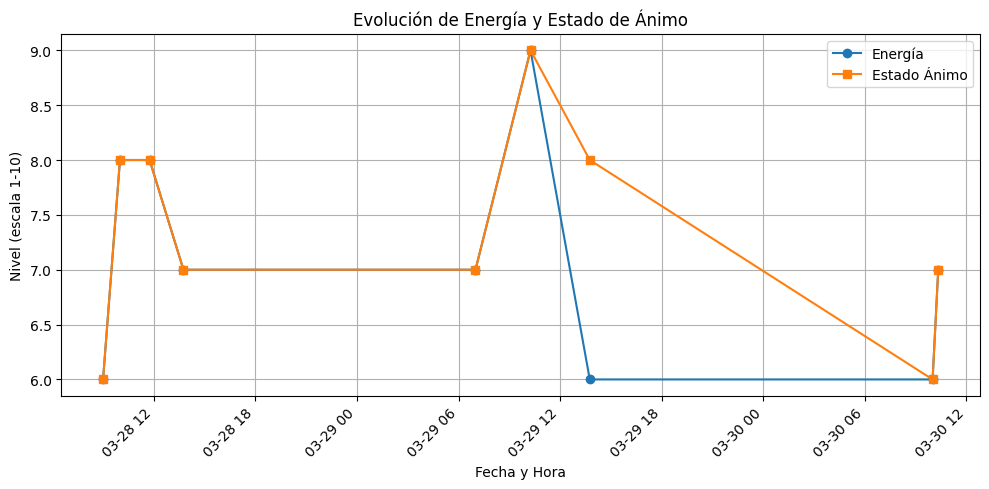

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(df['Datetime'], df['Energia'], label='Energía', marker='o')
plt.plot(df['Datetime'], df['Estado_Animo'], label='Estado Ánimo', marker='s')
plt.gcf().autofmt_xdate()
plt.title('Evolución de Energía y Estado de Ánimo')
plt.xlabel('Fecha y Hora')
plt.ylabel('Nivel (escala 1-10)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/2l/nm_lmk3x1qj_fvlw2znxrpq00000gn/T/ipykernel_9960/602848154.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/marccuestamunoz/repos/entorno-neurocoach/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


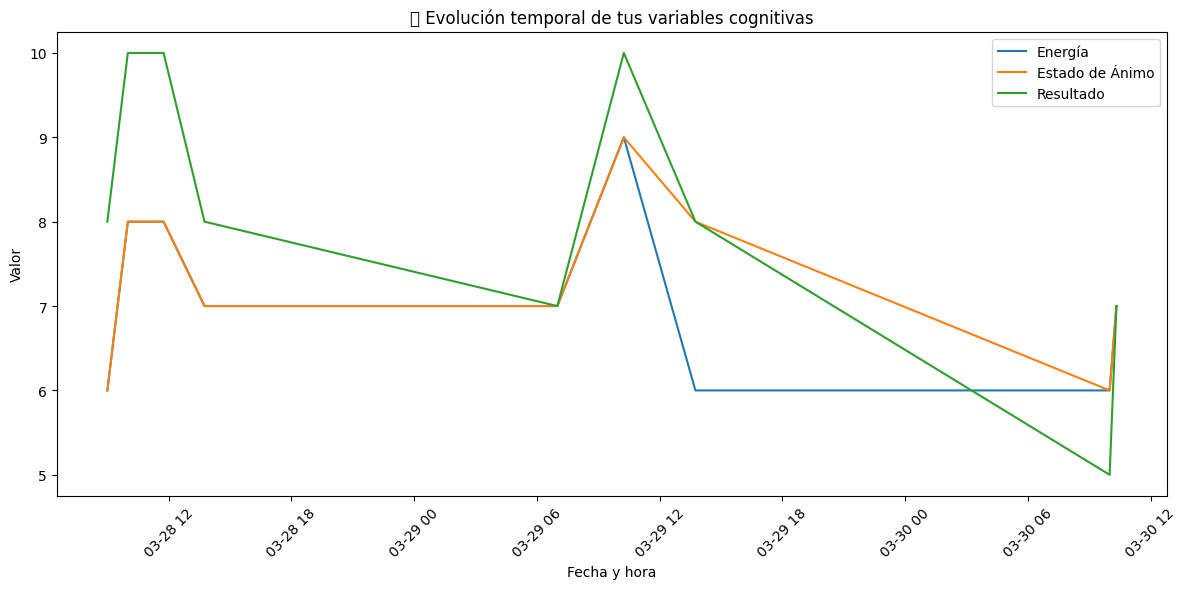

In [134]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Datetime', y='Energia', label='Energía')
sns.lineplot(data=df, x='Datetime', y='Estado_Animo', label='Estado de Ánimo')
sns.lineplot(data=df, x='Datetime', y='Resultado', label='Resultado')
plt.title('📈 Evolución temporal de tus variables cognitivas')
plt.xlabel('Fecha y hora')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Paso 3: Correlaciones entre variables

¿Energía y resultado están relacionados? ¿Estado de ánimo afecta más que energía?
Este mapa de calor te lo muestra visualmente.



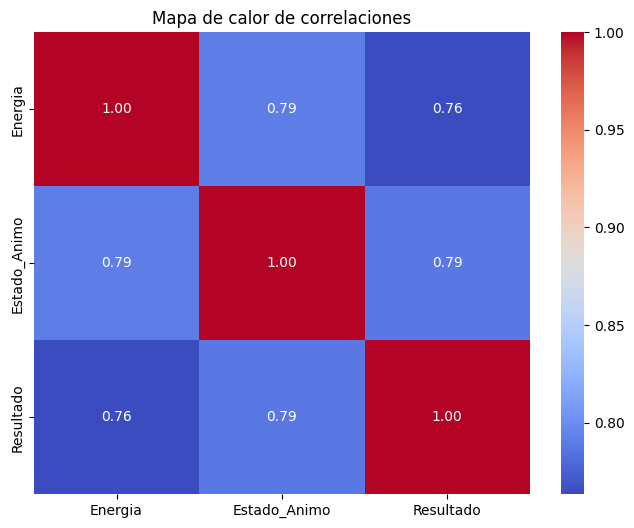

In [135]:
correlaciones = df[['Energia', 'Estado_Animo', 'Resultado']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()


## Paso 4: Análisis por dia de la semana
¿Rindes mejor los lunes o los sábados?  
Aquí se ven los promedios de cada variable según el día de la semana.


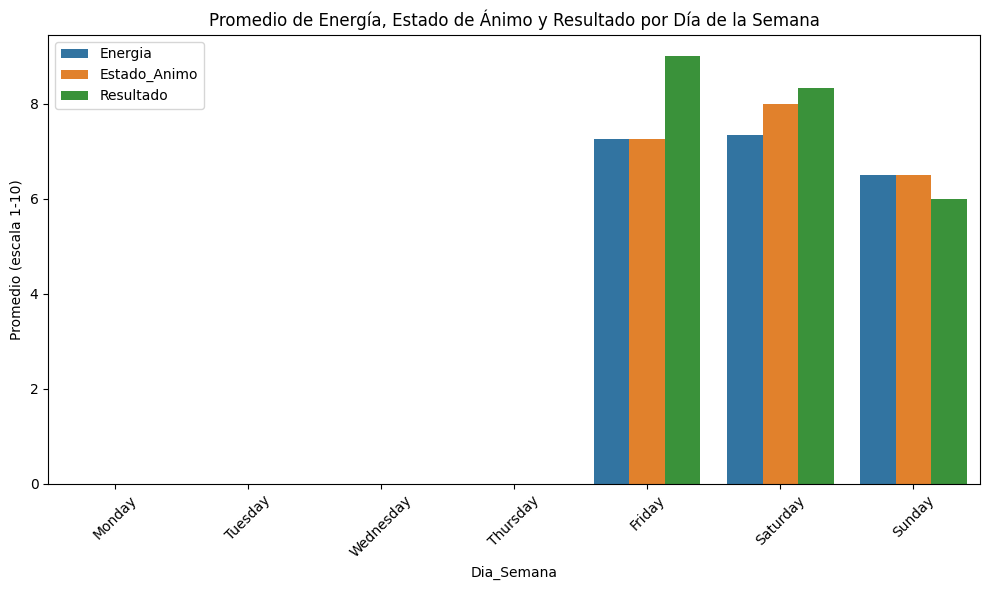

In [136]:
promedios = df.groupby("Dia_Semana")[["Energia", "Estado_Animo", "Resultado"]].mean().reset_index()
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
promedios["Dia_Semana"] = pd.Categorical(promedios["Dia_Semana"], categories=orden_dias, ordered=True)
promedios = promedios.sort_values("Dia_Semana")

promedios_melt = promedios.melt(id_vars="Dia_Semana", value_vars=["Energia", "Estado_Animo", "Resultado"],
                                 var_name="Variable", value_name="Promedio")

plt.figure(figsize=(10, 6))
sns.barplot(data=promedios_melt, x="Dia_Semana", y="Promedio", hue="Variable")
plt.title("Promedio de Energía, Estado de Ánimo y Resultado por Día de la Semana")
plt.ylabel("Promedio (escala 1-10)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Paso 5: Análisis por tipo de tarea
Explora qué tipo de actividad mejora tu rendimiento.  
Ejercicio, trabajo, descanso… ¿cuál te sienta mejor?


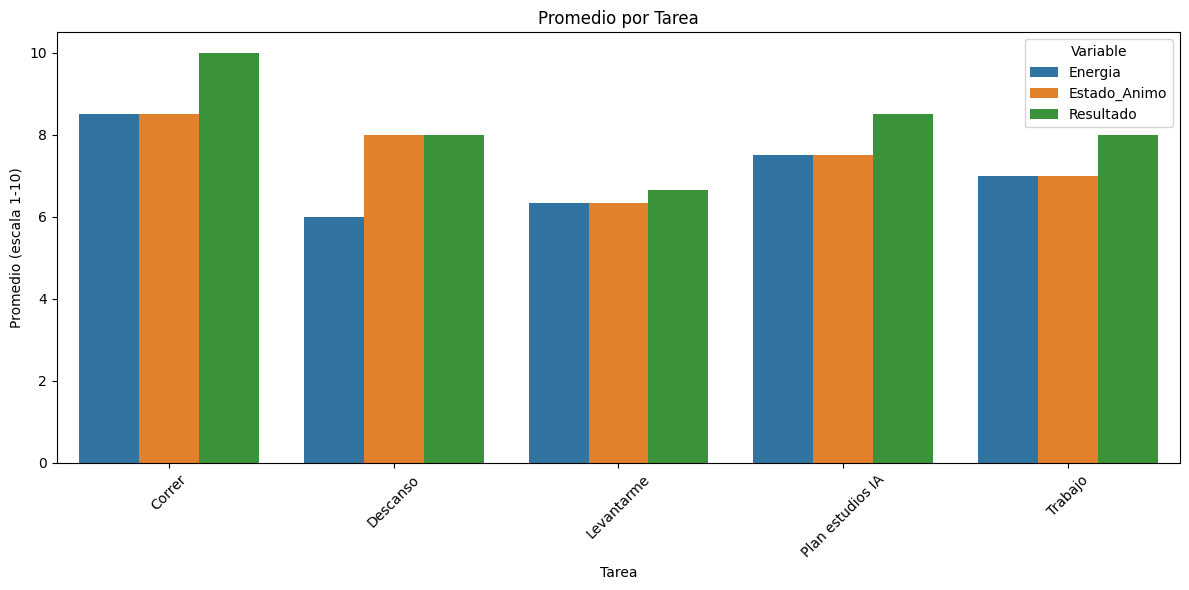

In [137]:
promedios_tarea = df.groupby('Tarea')[['Energia', 'Estado_Animo', 'Resultado']].mean()
promedios_tarea_reset = promedios_tarea.reset_index().melt(id_vars='Tarea', var_name='Variable', value_name='Promedio')

plt.figure(figsize=(12, 6))
sns.barplot(data=promedios_tarea_reset, x='Tarea', y='Promedio', hue='Variable')
plt.title("Promedio por Tarea")
plt.ylabel("Promedio (escala 1-10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

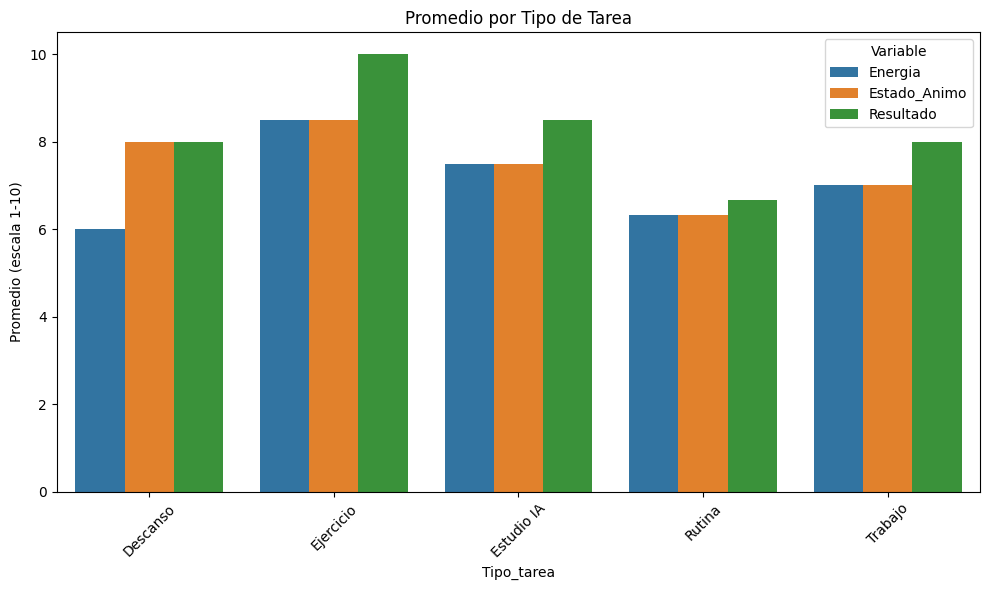

In [138]:
promedios_tipo = df.groupby('Tipo_tarea')[['Energia', 'Estado_Animo', 'Resultado']].mean()
promedios_tipo_reset = promedios_tipo.reset_index().melt(id_vars='Tipo_tarea', var_name='Variable', value_name='Promedio')

plt.figure(figsize=(10, 6))
sns.barplot(data=promedios_tipo_reset, x='Tipo_tarea', y='Promedio', hue='Variable')
plt.title("Promedio por Tipo de Tarea")
plt.ylabel("Promedio (escala 1-10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [139]:
agrupados = df.groupby('Tarea')['Punto clave'].unique()

print("\n🧠 Puntos clave por Tarea:\n")
for tarea, puntos in agrupados.items():
    print(f"🏷️ {tarea}:")
    for punto in puntos:
        if pd.notna(punto) and punto.strip():
            print(f"   - {punto}")
    print("-" * 40)


🧠 Puntos clave por Tarea:

🏷️ Correr:
   - Calentamiento muy suave y progressivo
   - Ambiente y confianza del entorno
----------------------------------------
🏷️ Descanso:
   - Pensamiento claro y efectivo
----------------------------------------
🏷️ Levantarme:
   - Nada
   - No pensar y actuar
   - Necesario descanso
----------------------------------------
🏷️ Plan estudios IA:
   - Motivación proyecto IA
----------------------------------------
🏷️ Trabajo:
   - Buen ambiente
----------------------------------------


### 🧠 Paso 6: Inteligencia Adaptativa (Predicción de Resultados)

¿Puede una red neuronal predecir tu resultado cognitivo en una actividad?  
Aquí probamos un modelo simple de regresión con TensorFlow.

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore


# Variables numéricas y categóricas
X_num = df[['Energia', 'Estado_Animo']]
X_cat = df[['Tipo_tarea']]

# Codificar variable categórica
encoder = OneHotEncoder(sparse_output=False)
X_cat_encoded = encoder.fit_transform(X_cat)

# Unimos numéricas + categóricas codificadas
X_all = np.hstack([X_num.values, X_cat_encoded])
y = df['Resultado'].values

# Normalizamos X
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y, test_size=0.2, random_state=42)

# Definimos modelo MLP
modelo = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)  # Regresión → una sola salida
])

modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelo.fit(X_train, y_train, epochs=150, verbose=0)

# Evaluamos
loss, mae = modelo.evaluate(X_test, y_test, verbose=0)
print(f"🔍 MAE (Error Absoluto Medio): {mae:.2f}")


/Users/marccuestamunoz/repos/entorno-neurocoach/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🔍 MAE (Error Absoluto Medio): 1.80


## 🔮 Predicción de Resultado con un modelo de regresión (Red Neuronal)


🔍 MAE (Error Absoluto Medio): 8.60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/var/folders/2l/nm_lmk3x1qj_fvlw2znxrpq00000gn/T/ipykernel_9960/1058920461.py:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2l/nm_lmk3x1qj_fvlw2znxrpq00000gn/T/ipykernel_9960/1058920461.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("graficos/comparacion_predicciones.png")
/Users/marccuestamunoz/repos/entorno-neurocoach/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


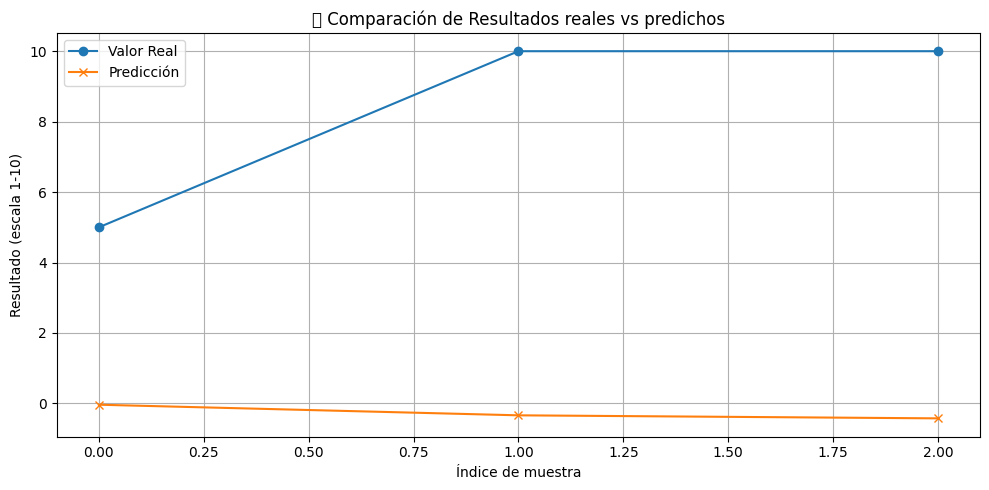

In [141]:
from tensorflow.keras import Input # type: ignore
import os

# Variables numéricas
X_num = df[['Energia', 'Estado_Animo']]

# Variables categóricas (tipo de tarea)
X_cat = pd.get_dummies(df['Tipo_tarea'], prefix='Tarea')

# Concatenamos todo
X = pd.concat([X_num, X_cat], axis=1)
y = df['Resultado']

# Bloque 2: División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bloque 3: Modelo de red neuronal para regresión
modelo = Sequential()
modelo.add(Input(shape=(X.shape[1],)))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dense(1, activation='linear'))

X_train = np.array(X_train).astype("float32")
X_test = np.array(X_test).astype("float32")
y_train = np.array(y_train).astype("float32")
y_test = np.array(y_test).astype("float32")

modelo.compile(optimizer='adam', loss='mae')
historial = modelo.fit(X_train, y_train, epochs=200, verbose=0)

# Bloque 4: Evaluación del modelo
mae = modelo.evaluate(X_test, y_test, verbose=0)
print(f"🔍 MAE (Error Absoluto Medio): {mae:.2f}")

# Bloque 5: Predicciones
predicciones = modelo.predict(X_test).flatten()

# Gráfico comparando predicciones vs reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valor Real', marker='o')
plt.plot(predicciones, label='Predicción', marker='x')
plt.title("📊 Comparación de Resultados reales vs predichos")
plt.xlabel("Índice de muestra")
plt.ylabel("Resultado (escala 1-10)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("graficos/comparacion_predicciones.png")
plt.show()

Evaluación y guardado del gráfico de predicciones

## Recursos generados automáticamente:
Todos los gráficos y archivos generados están organizados:
- 📁 `fase2_analisis/graficos/`
- 📁 `fase2_analisis/insights/`
